# SciPy - Scientific algorithms collection for Python



## Introduction

SciPy package adds features to the low level algorithms of NumPy for multidimensional arrays, and provides many high level algorithms of scientific use. Some of the topics covered by SciPy are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integración ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Problemas de Eigenvalores de matrices dispersas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes multi-dimensional ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/Salida desde/hacia archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Cada uno de estos submódulos provee un muchas funciones y clases que pueden ser usadas para resolver problemas en sus respectivos tópicos.

En esta clases veremos cómo usar algunos de estos subpaquetes.

Para acceder al paquete SciPy en un programa Python, comenzamos importando todo desde el módulo `scipy`.

In [88]:
import scipy as sp 

Si sólo necesitamos usar una parte de las rutinas de SciPy podemos incluir selectivamente sólo aquellos módulos en los que estamos interesados. Por ejemplo, para incluir el paquete de álgebra lineal bajo el nombre `la`, podemos incluir:

In [89]:
import scipy.linalg as la

## Funciones Especiales

En muchos problemas de física y química computacional son importantes varias funciones matemáticas especiales. SciPy provee implementaciones de muchas de estas funciones especiales. Para más detalles, ver la lista de funciones en la documentación http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Para demostrar el uso típico de estas funciones especiales nos concentraremos en la función de Bessel de primera especie:

$J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m+\alpha+1)} {\left(\frac{x}{2}\right)}^{2m+\alpha}$


In [ ]:
from scipy.special import jn, jn_zeros

In [91]:
n = 0    # orden de la función
x = 0.0

# Función de Bessel de primera especie
print("J_{}({}) = {}".format(n, x, jn(n, x)))



J_0(0.0) = 1.0


<IPython.core.display.Javascript object>


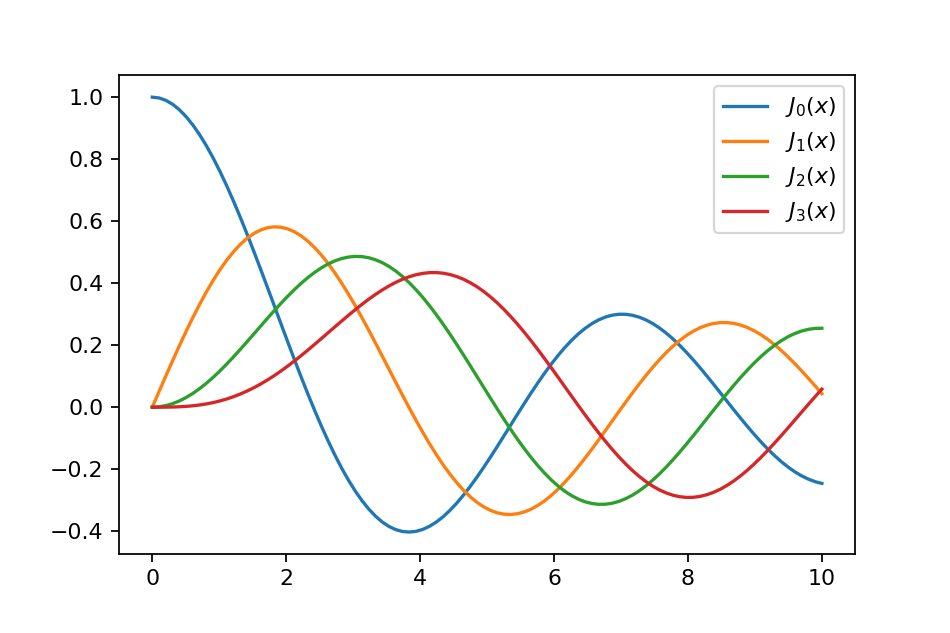

In [94]:
# El módulo scipy.special incluye muchas funciones de Bessel 
# Aquí usaremos las funciones jn e yn, que son las funciones de Bessel 
# de primera y segunda especie, y de orden real. Incluimos también las  
# funciones jn_zeros e yn_zeros que entregan los ceros de las
# funciones jn e yn.
#
%matplotlib notebook  

x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_{}(x)$".format(n))
plt.legend()

## Integración

### Integración numérica: cuadraturas

La evaluación numérica de una función, del tipo

$\displaystyle \int_a^b f(x) dx$

es llamada *cuadratura numérica*, o simplemente *cuadratura*. SciPy suministra funciones para diferentes tipos de cuadraturas, por ejemplo las funciones `quad`, `dblquad` y `tplquad` para calcular integrales simples, dobles o triples, respectivamente.

In [95]:
from scipy.integrate import quad, dblquad, tplquad

Las función `quad` acepta una gran cantidad de argumentos opcionales, que pueden ser usados para ajustar detalles del comportamiento de la función (ingrese `help(quad)` para más detalles).

El uso básico es el siguiente:

In [107]:
# define una función simple para ser integrada
def f(x,b):
    return b*x**2

In [108]:
x_inf = 0 # el límite inferior de x
x_sup = 2 # el límite superior de x

val, errabs = quad(f, x_inf, x_sup, args=(5.,))

print("valor de la integral =", val, ", error absoluto =", errabs)

valor de la integral = 13.333333333333332 , error absoluto = 1.4802973661668753e-13


Si necesitamos incluir argumento extras en la función integrando podemos usar el argumento `args`:

In [ ]:
# ceros de la funcion de Bessel 
n = 3 # order
m = 2 # numero de raizes a calcular
jn_zeros(n, m)

In [104]:
def integrando(x, n):
    """
    función de Bessel de primera especie y orden n. 
    """
    return jn(n, x)


x_inf = 0 # el límite inferior de x
x_sup = 6.38 # el límite superior de x

val, errabs = quad(integrando, x_inf, x_sup, args=(3,)) # evalua la integral con n=3

print(val, errabs)

1.356892674608161 1.5064534892951908e-14


Para funciones simples podemos usar la función lambda function (función anónima) en lugar de definir explícitamente una función para el integrando:

In [109]:
val, errabs = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf) # Inf = infinito!

print("Resultado numérico  =", val, errabs)

analitico = np.sqrt(np.pi)
print("Resultado analitico =", analitico)

Resultado numérico  = 1.7724538509055159 1.4202636780944923e-08
Resultado analitico = 1.7724538509055159


Como se muestra en este ejemplo, podemos usar 'Inf' y '-Inf' como límites de la integral.

Integrales de dimensión mayor se evalúan de forma similar:

In [111]:
def integrando(x, y):
    return np.exp(-x**2-y**2)

x_inf = 0  
x_sup = 10
y_inf = 0
y_sup = 10



In [112]:
val, errabs = dblquad(integrando, x_inf, x_sup, lambda x : y_inf, lambda x: y_sup)

print(val, errabs)

0.7853981633974476 1.3753098510218528e-08


Note como requerimos incorporar funciones lambda para los límites de la integración en y, ya que estos límites pueden en general ser funciones de x.

## Álgebra lineal

El módulo de álgebra lineal contiene muchas funciones relacionadas con matrices, incluyendo resolución de ecuaciones lineales, cálculo de valores propios, funciones de matrices (por ejemplo, para exponenciación matricial), varias decomposiciones diferentes (SVD, LU, cholesky), etc. 

Una documentación detallada está disponible aquí: http://docs.scipy.org/doc/scipy/reference/linalg.html

Veremos cómo usar algunas de estas funciones:

#### Sistemas de ecuaciones lineales

Los sistemas de ecuaciones lineales de la forma

$A x = b$

donde $A$ es una matriz y $x,b$ son vectores, pueden ser resueltos del modo siguiente:

In [113]:
from scipy import linalg

A = np.array([[1,2,3], [4,12,6], [7,8,9]])
b = np.array([4,2,10])

In [115]:
x = linalg.solve(A, b)
x

array([-0.14285714, -0.71428571,  1.85714286])

In [116]:
# verificamos la solución
np.dot(A, x) - b

array([-4.4408921e-16,  0.0000000e+00,  0.0000000e+00])

Podemos también hacer lo mismo con

$A X = B$,

donde ahora $A, B$ y $X$ son matrices:

In [117]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [118]:
X = linalg.solve(A, B)

In [119]:
X

array([[-0.12473373, -0.74986192,  1.12497171],
       [ 0.67263058, -0.32910655, -0.1173779 ],
       [ 0.50046818,  1.68247152,  0.08798596]])

In [120]:
# verificamos la solución
np.dot(A, X) - B

array([[ 1.11022302e-16,  5.55111512e-17,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.11022302e-16, -1.11022302e-16]])

#### Valores y vectores propios

El problema de valores propios para la matriz $A$:

$\displaystyle A v_n = \lambda_n v_n$,

donde $v_n$ es el $n$-ésimo vector propio y $\lambda_n$ es el $n$-ésimo valor propio.

Para calcular los vectores propios de una matriz usamos `eigvals` y para calcular tanto los valores como los vectores propios, podemos usar la función `eig`:

In [121]:
evals = linalg.eigvals(A)

In [124]:
evals[0]

(1.7530508006710468+0j)

In [125]:
evals, evecs = linalg.eig(A)

In [126]:
evals

array([1.7530508 +0.j        , 0.23403961+0.42833479j,
       0.23403961-0.42833479j])

In [127]:
evecs

array([[-0.72165864+0.j        ,  0.61371722+0.j        ,
         0.61371722-0.j        ],
       [-0.38829291+0.j        , -0.01192091+0.58740698j,
        -0.01192091-0.58740698j],
       [-0.57309461+0.j        , -0.43115647-0.30375352j,
        -0.43115647+0.30375352j]])

Los vectores propios correspondientes al $n$-ésimo valor propio (guardado en `evals[n]`) es la $n$-ésima *columna* en `evecs`, es decir, `evecs[:,n]`. Para verificar esto, intentemos multiplicar los vectores propios con la matriz y comparar el resultado con el producto del vector propio y el valor propio:

In [128]:
n = 1

np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n]

array([2.77555756e-17+5.55111512e-17j, 5.55111512e-17+5.55111512e-17j,
       2.35922393e-16+2.77555756e-16j])

#### Operaciones matriciales

In [129]:
# matriz inversa
linalg.inv(A)

array([[ 1.19946582, -1.69436316,  0.35589769],
       [ 0.93793937,  0.45020777, -1.09962473],
       [-0.93325065,  1.26953466,  0.88545555]])

In [130]:
# determinante
linalg.det(A)

0.41765599664411374

In [131]:
# norma de un matri
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(1.8121967571892836, 2.276097433027145)

## Optimización

La optimización (encontrar el máximo o el mínimo de una funciónn) constituye un campo amplio en matemáticas, y la optimización de funciones complicadas o de muchas variables puede ser complicada. Aquí sólo revisaremos algunos casos muy simples. Para una introducción detallada a la optimización con SciPy, ver (en inglés): http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para usar el módulo de optimización de Scipy hay que importar el módulo `optimize`:

In [134]:
from scipy import optimize

### Encontrando mímimos

Veamos primero cómo encontrar el mínimo de una función simple de una variable:

In [135]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

<IPython.core.display.Javascript object>


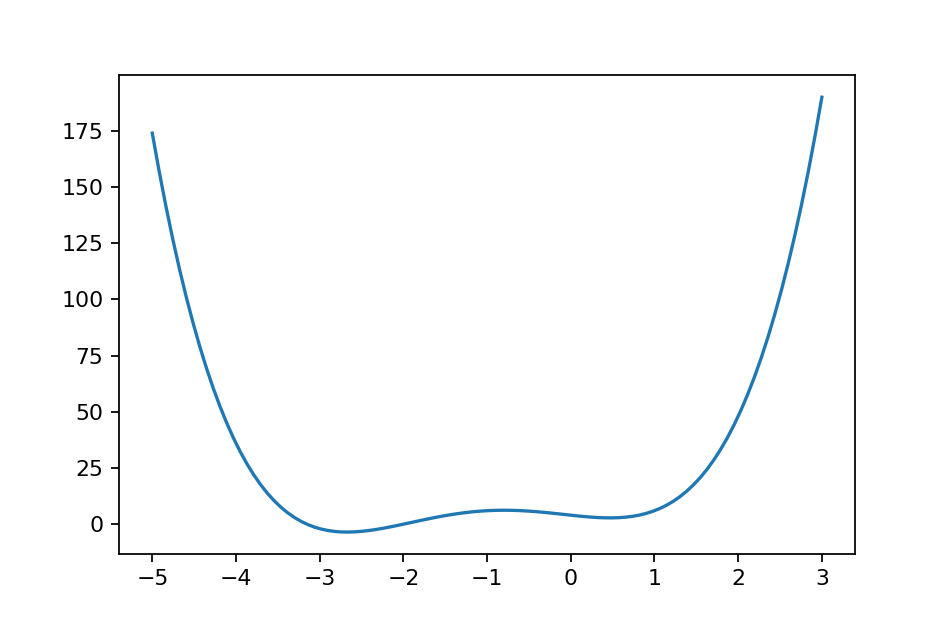

In [133]:
%matplotlib notebook  

x = np.linspace(-5, 3, 100)
plt.plot(x, f(x))

Podemos usar la función `fmin_bfgs` para encontrar el mínimo de la función:

In [136]:
x_min = optimize.fmin_bfgs(f, -2) # busca un mínimo local cerca -2
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298155])

In [137]:
optimize.fmin_bfgs(f, 0.5)  # busca un mínimo local cerca 0.5

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([0.46961745])

Podemos también usar las funciones `brent` o `fminbound`. Estas funciones tienen una sintaxis algo distinta y usan algoritmos diferentes.

In [138]:
optimize.brent(f)

0.46961743402759754

In [139]:
optimize.fminbound(f, -4, 2)  # busca el mínimo en el intervalo (-4,2)

-2.6729822917513886

### Encontrando las raíces de una función

Para encontrar las soluciones a una ecuación de la forma $f(x) = 0$ podemos usar la función `fsolve`. Ella requiere especificar un punto inicial: 

In [140]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

Primero Grafiquemos la función en questión...

<IPython.core.display.Javascript object>


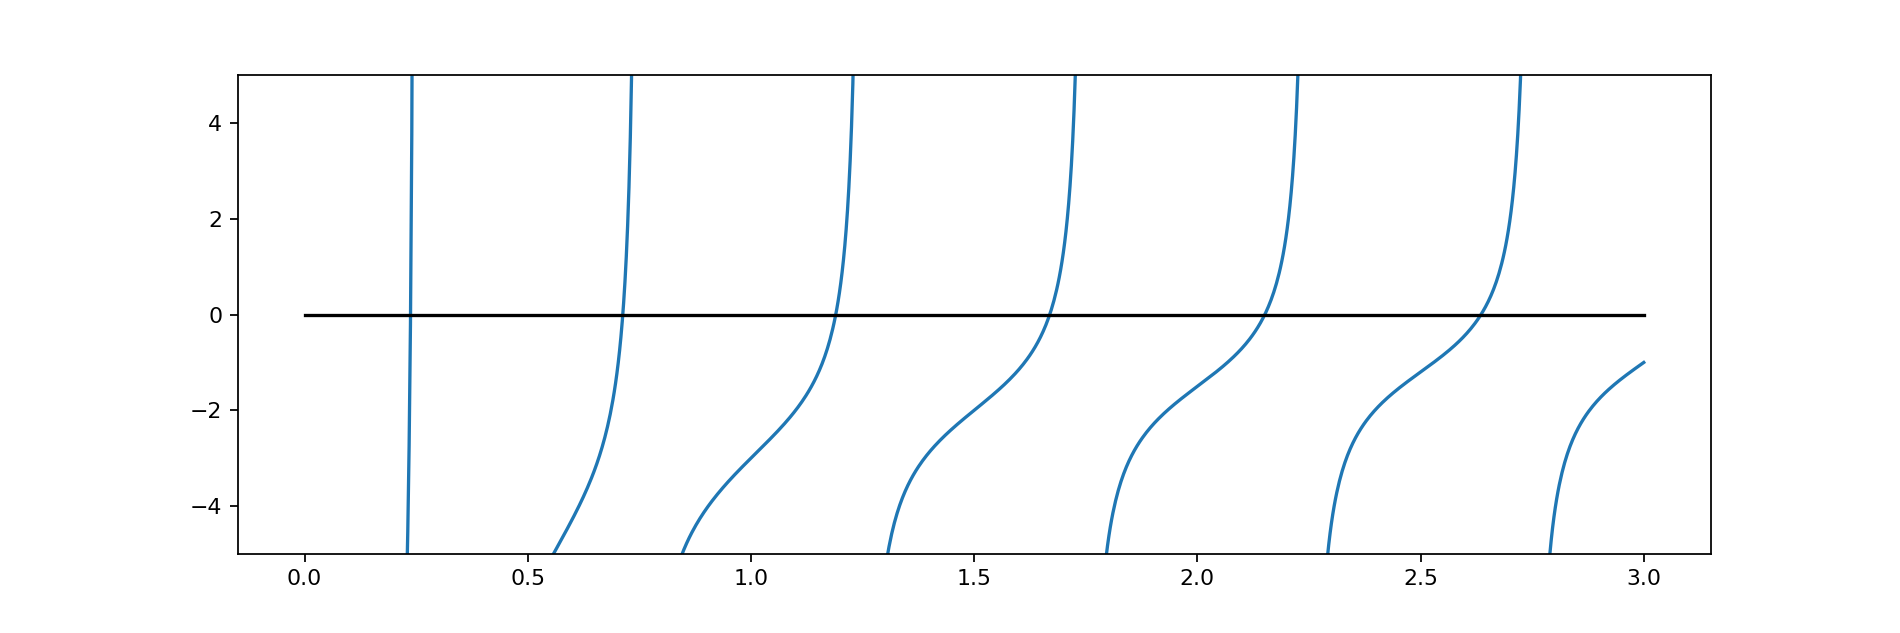

/home/stvogtgeisse/.anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
%matplotlib notebook  


fig, ax  = plt.subplots(figsize=(12,4))
x = np.linspace(0, 3.0, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.NaN # elimina líneas verticales cuando la función cambia de signo
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [143]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [144]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [145]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Estadística

El módulo `scipy.stats` contiene varias distribuciones estadísticas, funciones estadísticas. Para una documentación completa de estas las características, ver (en inglés) [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

También existe un paquete Python muy poderoso para modelamiento estadístoco llamado statsmodels. Ver [http://statsmodels.sourceforge.net](http://statsmodels.sourceforge.net) para más detalles.

In [146]:
from scipy import stats

crea una variable aleatoria (discreta) con distribución poissoniana

$P(k) = \frac{\mu^k e^{\mu}}{k!}$


In [147]:

X = stats.poisson(3.5) # mu = 2.5  (goles promedio en un mundial)
X.pmf(1)  # Probabilidad de 0 goles en un partido del mundial.


0.10569084197811476

<IPython.core.display.Javascript object>


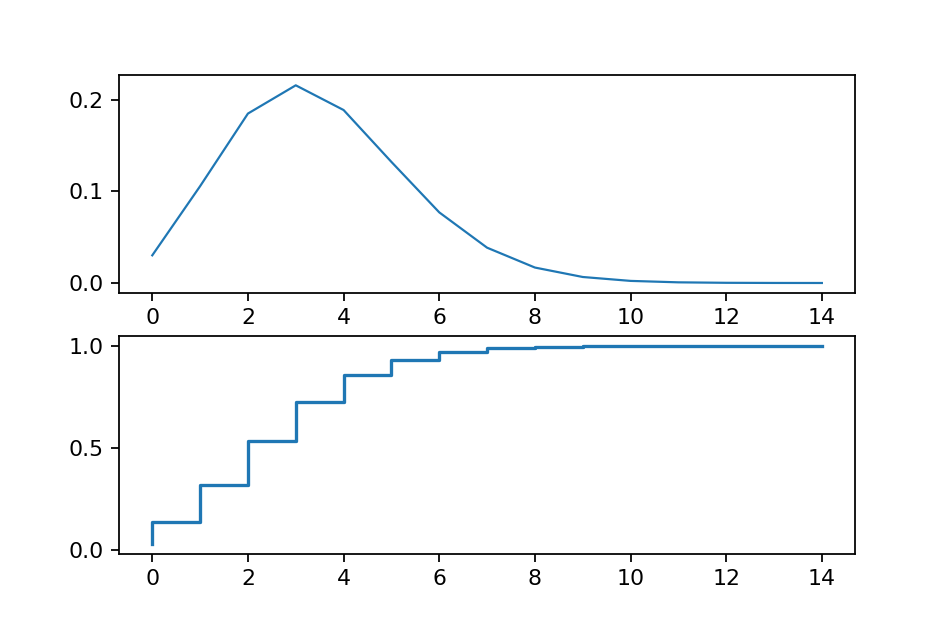

In [150]:
n = np.arange(0,15)

fig, axes = plt.subplots(2,1)

# grafica la "probability mass function" (PMF)
axes[0].plot(n, X.pmf(n),lw=1,linestyle="-")
# grafica la "commulative distribution function" (CDF)
axes[1].step(n, X.cdf(n))

#### Distribución normal 

In [151]:
# crea una variable aleatoria (contínua) con distribución normal
Y = stats.norm(loc=1.0)

<IPython.core.display.Javascript object>


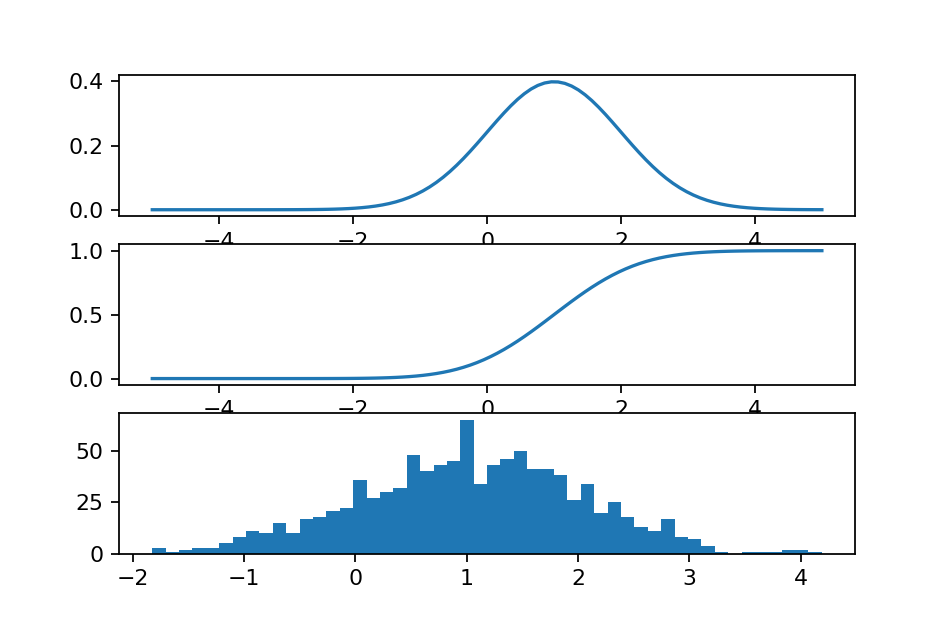

In [155]:
%matplotlib notebook  


x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1)

# grafica la función distribución de probabilidad ("probability distribution function", PDF)
axes[0].plot(x, Y.pdf(x))

# grafica función de distribución acumulada ("commulative distributin function", CDF)
axes[1].plot(x, Y.cdf(x));

# grafica histograma de 1000 realizaciones aleatorias de la variable estocástica Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Estadística:

In [156]:
X.mean(), X.std(), X.var() # distribución de Poission

(3.5, 1.8708286933869707, 3.5)

In [157]:
Y.mean(), Y.std(), Y.var() # distribucuón normal

(1.0, 1.0, 1.0)

####  Ejemplo: Impacto de cometas y meteoritos

In [ ]:
# Datos de diametro en km de cometas apocalipticos que han impactado la tierra en su historia

data = [7.40, 6.90, 5.20, 6.20, 4.20, 8.10, 9.50, 7.40, 6.80, 7.50, 7.80, 6.60, 6.00, 8.60, 8.0, 7.20, 7.30, 9.00, 9.11, 9.20, 8.20, 10.01, 11.3]


In [158]:
mean, sigma = stats.norm.fit(data)
print(mean)
print(sigma)

7.718260869565216
1.556285019648346


<IPython.core.display.Javascript object>


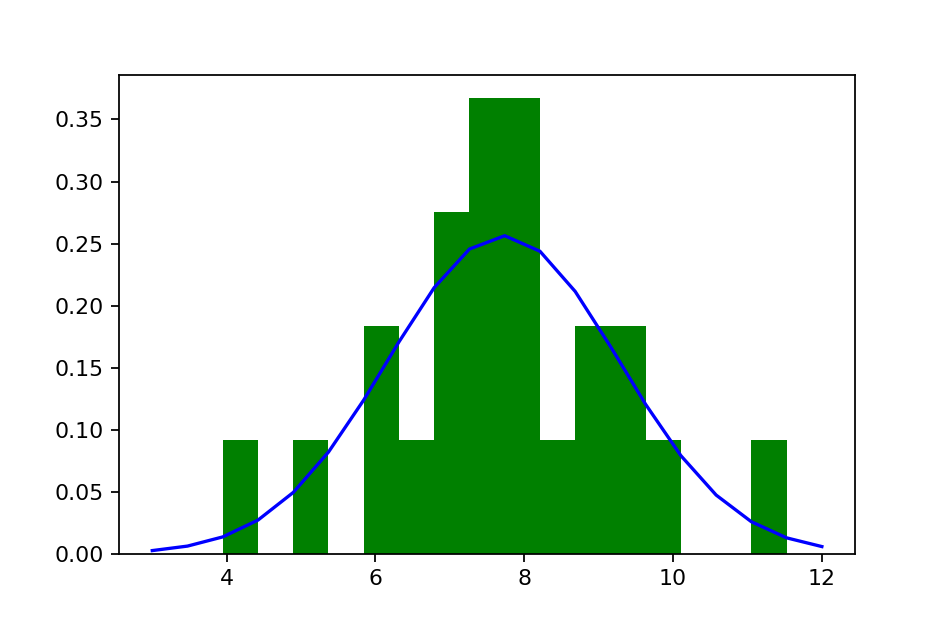

/home/stvogtgeisse/.anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


In [164]:
%matplotlib notebook  


x = np.linspace(3,12,20)

D = stats.norm(loc=mean, scale = sigma)
plt.hist(data,x,color="g", normed=True)
plt.plot(x,D.pdf(x),color='b');


In [160]:
D.mean(), D.std(), D.var()

(7.718260869565216, 1.556285019648346, 2.422023062381853)

In [161]:
prob_over_10 = 1 - D.cdf(x= 10) 

In [162]:
print(prob_over_10)

0.0713044266215016


## Regresiónes lineales

Regresiones lineales son un métdod científico simple, que permite  predecir
una relación continua y lineal entre dos variables. En el ejemplo a continuación se quiere 
obtener la masa molecular de una gas a partir de datos reales de presión y densidad del gas. 
La masa molecular del gas se puede calcular simplemente a partir de la ecuación de los gases ideales como:

\begin{equation}
\mu = \left(\frac{\rho}{P}\right)_{P\rightarrow 0} RT
\end{equation}

donde $\rho$ es la densidad del gas. En estricto rigor esta ecuación solamente es valida en el límite $P \rightarrow 0 $. Por 
eso que hay que utilizar una regresión lineal para extrapolar los datos a P=0. Gráficamos entonces la razón $\rho/P$ vs $P$.

Considermos los siguientes presiones de gas en kPa: 

In [ ]:
P = [12.223,25.20,36.97,60.37,85.23,101.3]
P = [float(x)*1000 for x in P] # en Pa⋅⋅
rho = [0.225, 0.456, 0.664, 1.062, 1.468, 1.734]
rho = [float(x)*1000 for x in rho ] # en g/m^3
P_d = []

for i in range(len(P)):
    P_d.append(float(rho[i])/float(P[i]))



Ahora que tenemos los datos podemos  visualizarlos utilizanod Matplotlib

<IPython.core.display.Javascript object>


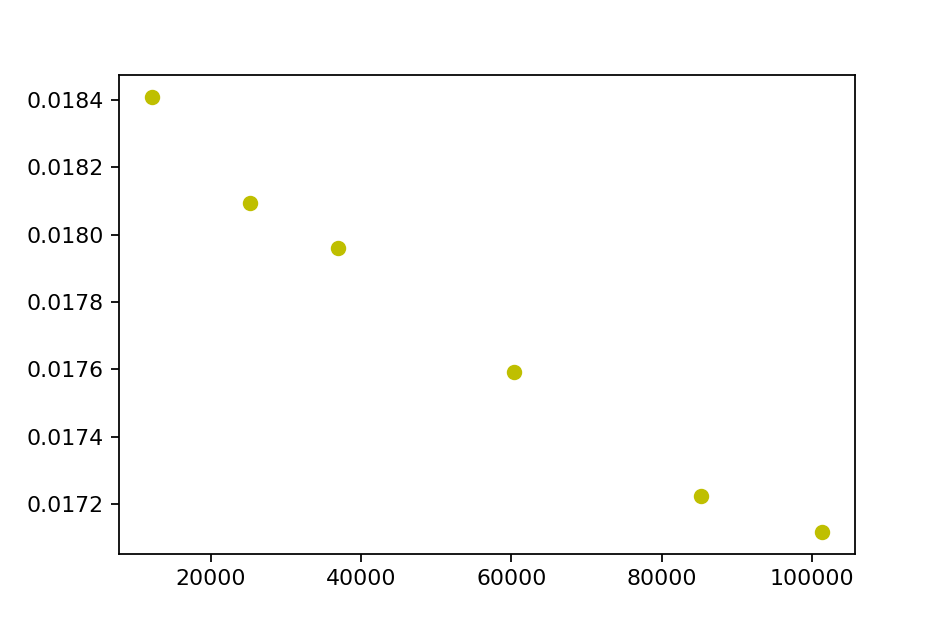

In [169]:
%matplotlib notebook  

plt.plot(P,P_d, 'yo')

Podemos hacer el fit lineal utulizando numpy o scipy! 

In [170]:
# Usando numpy
fit = np.polyfit(P,P_d,1)
print(fit)

# Usando scipy
fit_scipy = stats.linregress(P,P_d)
print(fit_scipy)
slope, intercept, r_value, p_value, std_err = stats.linregress(P,P_d)



[-1.44547568e-08  1.85068087e-02]
LinregressResult(slope=-1.445475684633581e-08, intercept=0.01850680871471868, rvalue=-0.9928586054695316, pvalue=7.631716992796769e-05, stderr=8.684066628950703e-10)


<IPython.core.display.Javascript object>


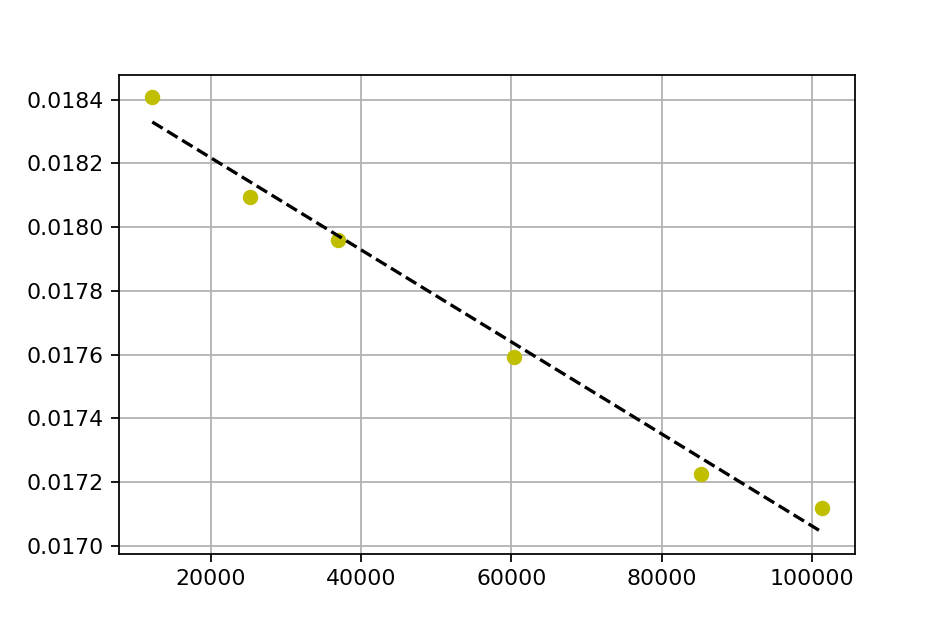

La masa molar es: 45.875030922091106 g/mol


In [171]:
%matplotlib notebook  


fit_fn = np.poly1d(fit)
plt.plot(P,P_d, 'yo', P, fit_fn(P), '--k')
#plt.legend("y = "+str(slope)+"x +"+str(intercept))

R = str(round(r_value,4))
m = str(round(slope,4))
t = str(round(intercept,4))

#plt.legend("y = "+m+"x +"+t+"   R = "+R, 'upper left')
plt.grid(True)

R = 8.314
T = 298.15

Mu = R*T*intercept

print("La masa molar es: "+str(Mu)+ " g/mol")
